In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf

In [5]:
# Read in data
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\CO2_emission_prediction\emissions.csv')

# Convert to Datetime format
df['Date'] = df['YYYYMM'].apply(lambda x: pd.to_datetime(x, format='%Y%m',errors='coerce'))
# Remove NaT values
df['NaT'] = df['Date'].apply(lambda x: str(x))
df = df[df['NaT']!='NaT']
df = df.drop(columns='NaT')

# Remove entries that are 'Not Available'
df = df[df['Value']!='Not Available']
# Convert data to float 
df['Value'] = df['Value'].apply(lambda x: pd.to_numeric(x))

# Index data with dates
data = pd.DataFrame(index=df['Date'])
data['Value'] = list(df['Value'])
data['Description'] = list(df['Description'])

# Print first ten rows of data
print(data.head(n=10))

             Value                               Description
Date                                                        
1973-01-01  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  61.798  Coal Electric Power Sector CO2 Emissions
1973-06-01  66.538  Coal Electric Power Sector CO2 Emissions
1973-07-01  72.626  Coal Electric Power Sector CO2 Emissions
1973-08-01  75.181  Coal Electric Power Sector CO2 Emissions
1973-09-01  68.397  Coal Electric Power Sector CO2 Emissions
1973-10-01  67.668  Coal Electric Power Sector CO2 Emissions


                                                        Value
Description                                                  
Total Energy Electric Power Sector CO2 Emissions    82352.676
Coal Electric Power Sector CO2 Emissions            65782.393
Natural Gas Electric Power Sector CO2 Emissions     11295.359
Petroleum Electric Power Sector CO2 Emissions        4982.993
Residual Fuel Oil Electric Power Sector CO2 Emi...   4239.312
Distillate Fuel, Including Kerosene-Type Jet Fu...    404.887
Petroleum Coke Electric Power Sector CO2 Emissions    338.785
Non-Biomass Waste Electric Power Sector CO2 Emi...    281.367
Geothermal Energy Electric Power Sector CO2 Emi...     10.563


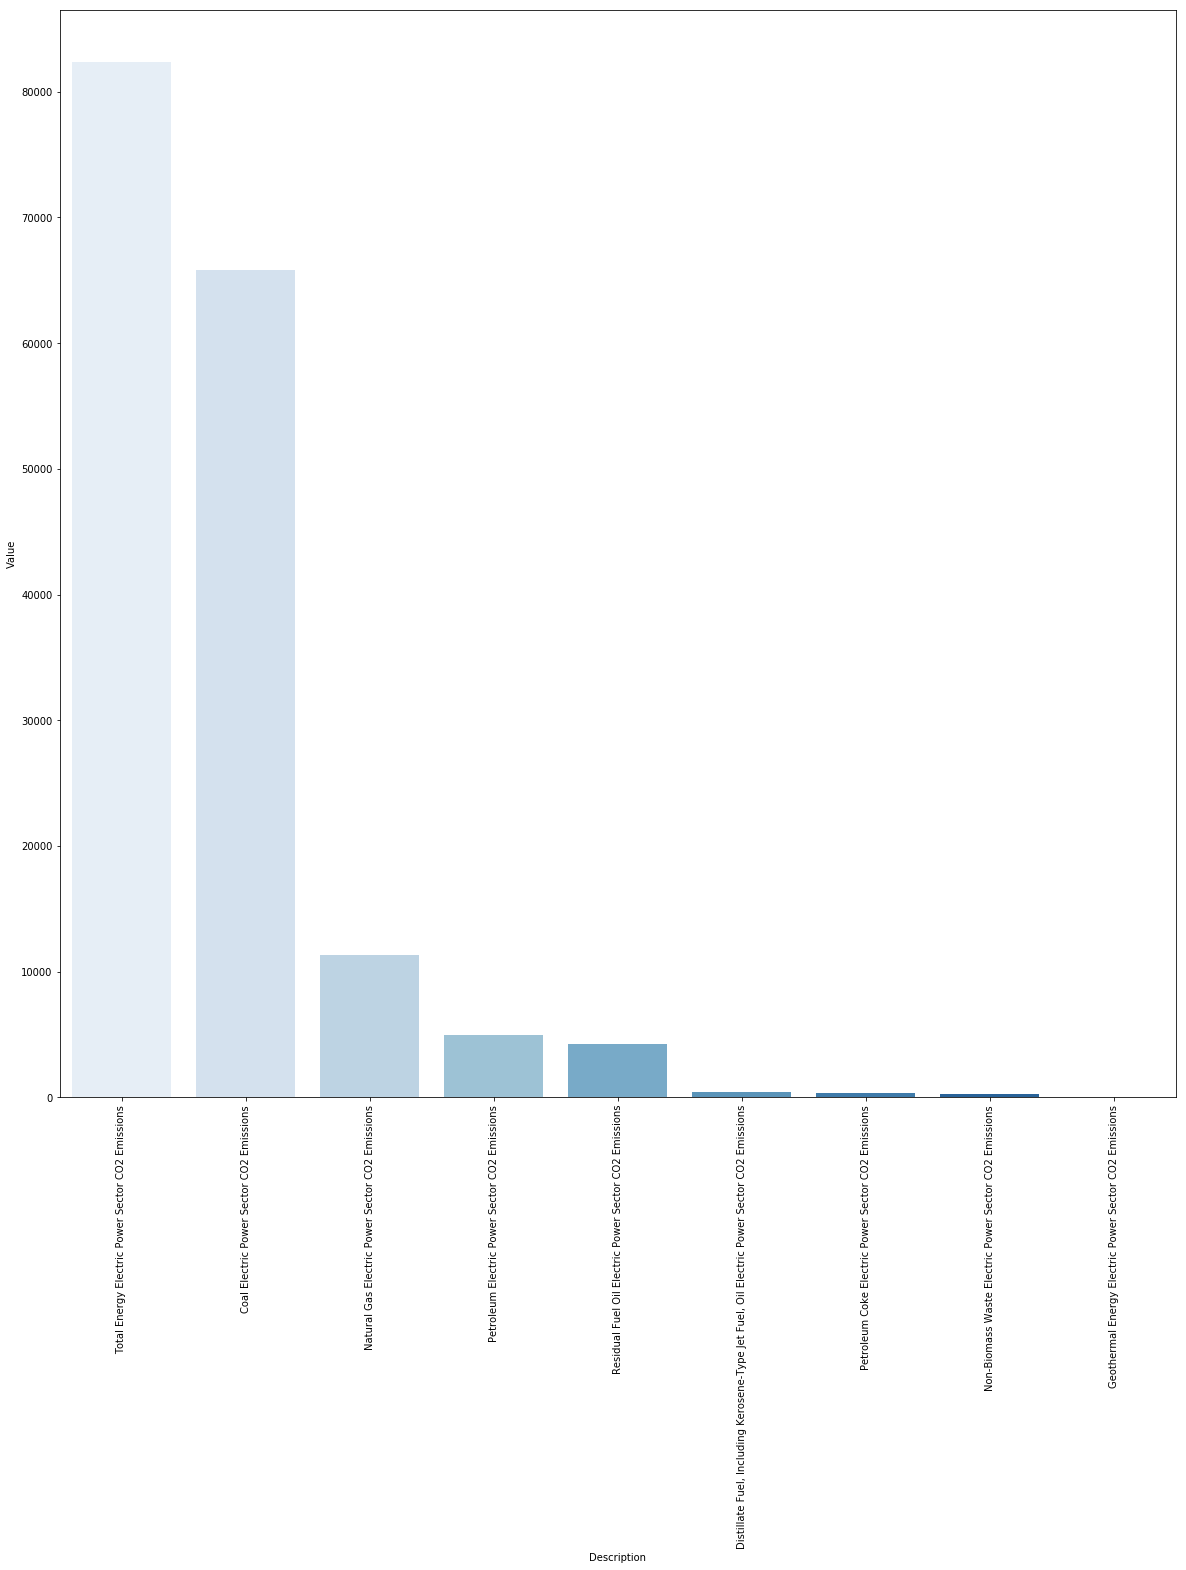

In [33]:
# Show biggest contributiors to CO2 output
sources = data.groupby('Description').sum()
bar = sources.sort_values(by='Value',ascending=False)
print(bar)

# Create barplot showing biggest contributors to CO2 output
plt.figure(figsize=(20,20))
sns.barplot(y='Value',x=bar.index,data=bar,palette='Blues')
plt.xticks(rotation='vertical')
plt.show()

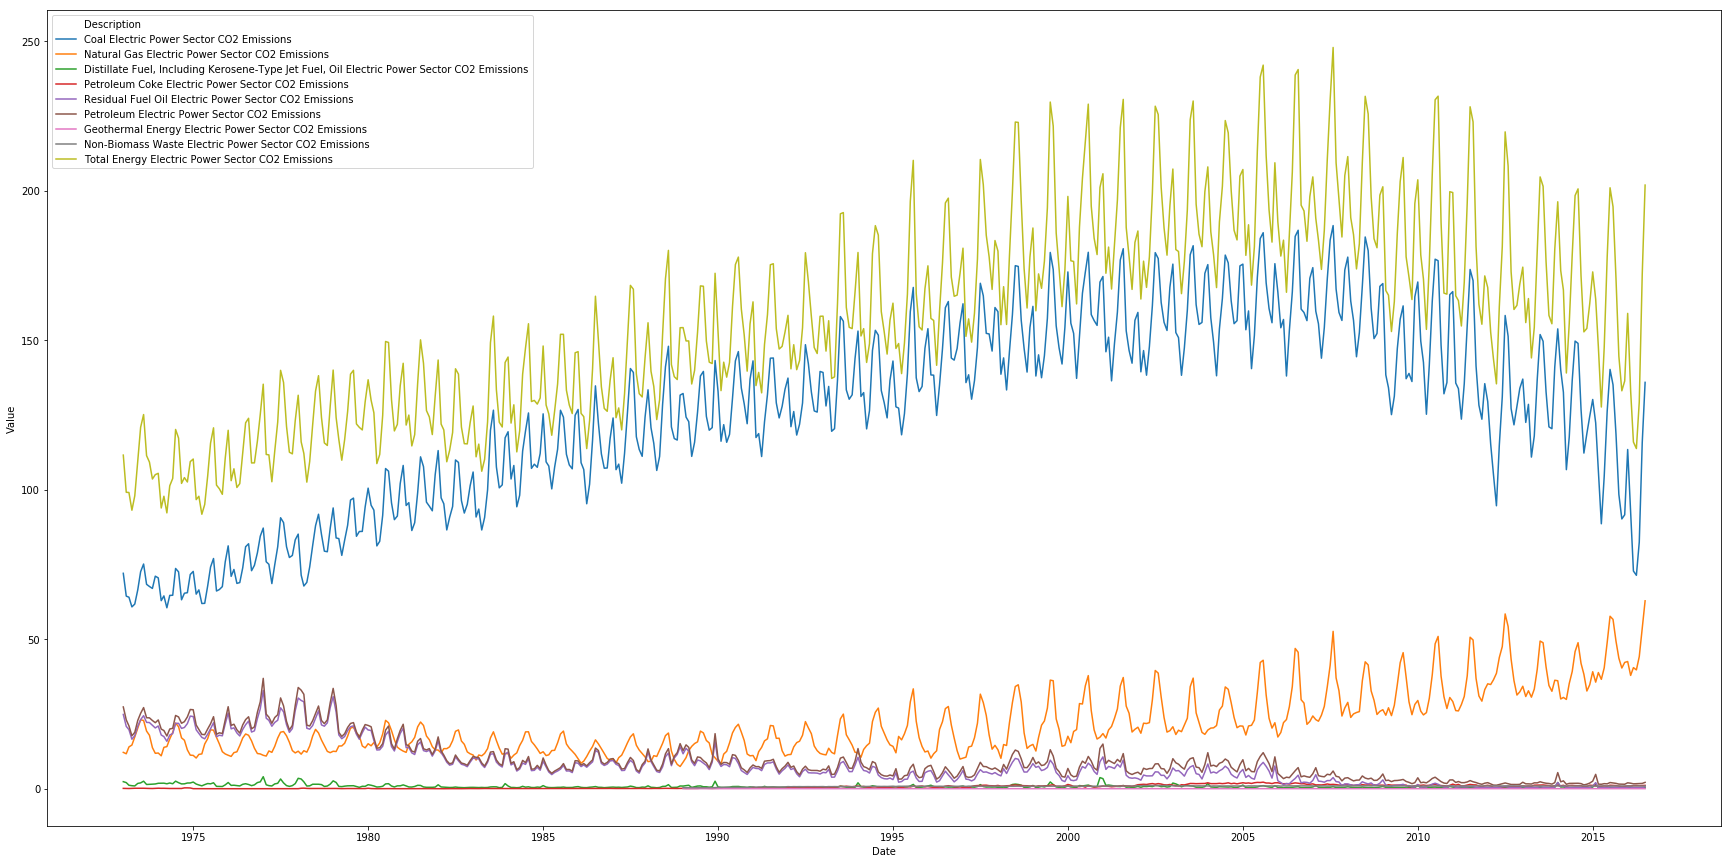

In [34]:
# Plot trend in CO2 output by source over time
plt.figure(figsize=(30,15))
sns.lineplot(data=data, x=data.index,y='Value',hue='Description')

In [ ]:
# Add in code to seperate data into test in training set.  Use last 5-10 years as test?

In [35]:
# Collect top 5 contributors into seperate variables
te = data[data['Description']=='Total Energy Electric Power Sector CO2 Emissions']
ce = data[data['Description']=='Coal Electric Power Sector CO2 Emissions']
ng = data[data['Description']=='Natural Gas Electric Power Sector CO2 Emissions']
pe = data[data['Description']=='Petroleum Electric Power Sector CO2 Emissions']
rf = data[data['Description']=='Residual Fuel Oil Electric Power Sector CO2 Emissions']

In [96]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics for timeseries
    rolmean = timeseries.rolling(center=False,window=12).mean()
    rolstd = timeseries.rolling(center=False,window=12).std()

    # Plot rolling statistics alongside data
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation of Time Series')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test and print results
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    output = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)

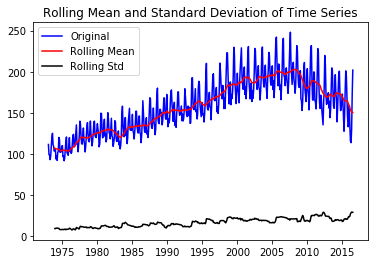

Results of Dickey-Fuller Test:
ADF Test Statistic              -1.809627
p-value                          0.375693
Number of Lags Used             14.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64


In [97]:
# Data is not yet stationary based on high p value
test_stationarity(te.Value)

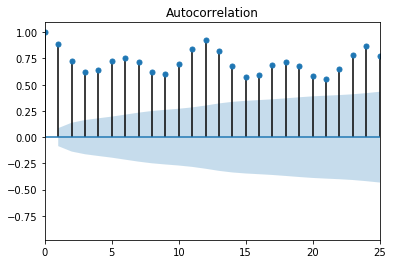

In [98]:
# Create ACF Plot from raw data
plot_acf(te.Value)
plt.xlim(0,25)
plt.show()

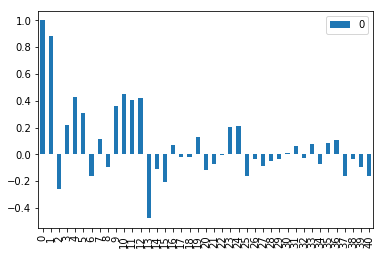

In [99]:
# Create PACF Plot from raw data
x_pacf = pd.DataFrame(pacf(te.Value))
x_pacf.plot(kind='bar')

In [100]:
# Lets try shifting the data in a number of different ways to make data stationary
te['Log_Difference'] = np.log(te.Value).diff()
te['Seasonal_Difference'] = te.Value - te.Value.shift(12)
te['Shift_1'] = te.Value - te.Value.shift(1)

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

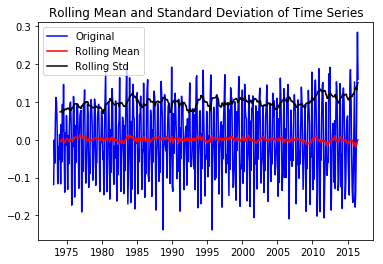

Results of Dickey-Fuller Test:
ADF Test Statistic            -6.487986e+00
p-value                        1.246987e-08
Number of Lags Used            1.300000e+01
Number of Observations Used    5.080000e+02
Critical Value (1%)           -3.443288e+00
Critical Value (5%)           -2.867246e+00
Critical Value (10%)          -2.569809e+00
dtype: float64


In [101]:
test_stationarity(te.Log_Difference.dropna(inplace=False))

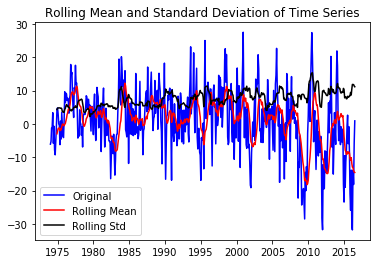

Results of Dickey-Fuller Test:
ADF Test Statistic              -5.495918
p-value                          0.000002
Number of Lags Used             12.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [102]:
test_stationarity(te.Seasonal_Difference.dropna(inplace=False))

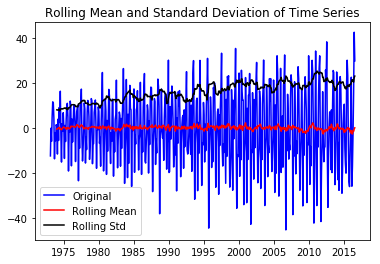

Results of Dickey-Fuller Test:
ADF Test Statistic            -6.610275e+00
p-value                        6.402884e-09
Number of Lags Used            1.300000e+01
Number of Observations Used    5.080000e+02
Critical Value (1%)           -3.443288e+00
Critical Value (5%)           -2.867246e+00
Critical Value (10%)          -2.569809e+00
dtype: float64


In [103]:
test_stationarity(te.Shift_1.dropna(inplace=False))

# Seems like the log difference and the shift-1 both make the data stationary based on p-value and test statistic 

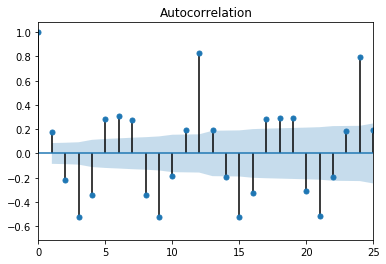

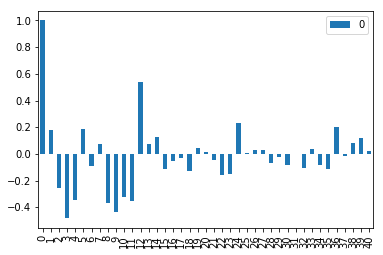

In [104]:
# Create ACF and PACF plots for log differenced data
plot_acf(te.Log_Difference.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Log_Difference.dropna(inplace=False)))
x_pacf.plot(kind='bar')

In [105]:
# Based on this it seems that there is a significant seasonal trend still influencing log shifted data 

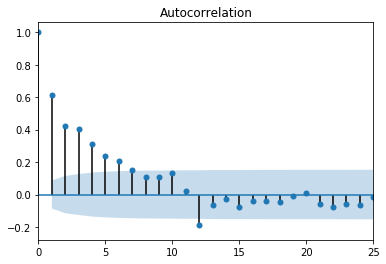

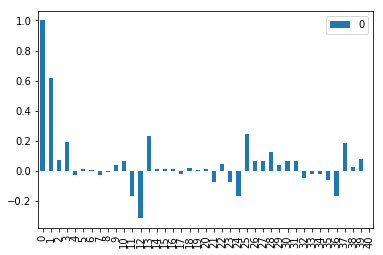

In [106]:
# Create ACF and PACF plots for seasonally shifted data
plot_acf(te.Seasonal_Difference.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Seasonal_Difference.dropna(inplace=False)))
x_pacf.plot(kind='bar')

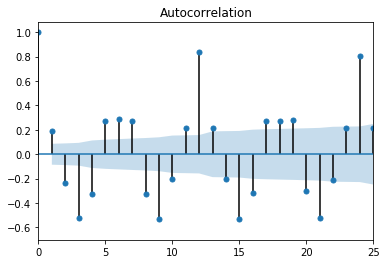

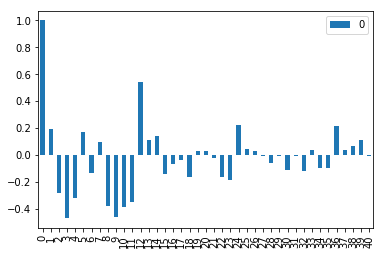

In [107]:
# Create plots for singly shifted data
plot_acf(te.Shift_1.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Shift_1.dropna(inplace=False)))
x_pacf.plot(kind='bar')

In [108]:
# Attempt to remove seasonal dependence from log shifted data and singly shifted data
te['Seas_Log_Diff'] = te.Log_Difference - te.Log_Difference.shift(12)
te['Shift_1_Seas'] = te.Shift_1 - te.Shift_1.shift(12)

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


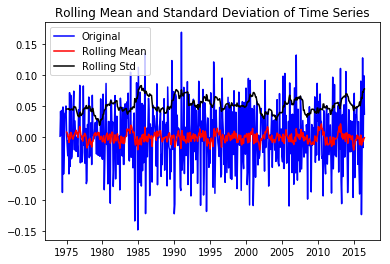

Results of Dickey-Fuller Test:
ADF Test Statistic            -8.470788e+00
p-value                        1.479642e-13
Number of Lags Used            1.400000e+01
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


In [109]:
test_stationarity(te.Seas_Log_Diff.dropna(inplace=False))

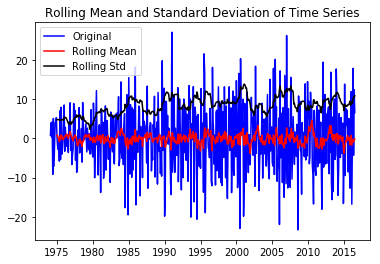

Results of Dickey-Fuller Test:
ADF Test Statistic            -8.574894e+00
p-value                        8.012370e-14
Number of Lags Used            1.400000e+01
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


In [110]:
test_stationarity(te.Shift_1_Seas.dropna(inplace=False))

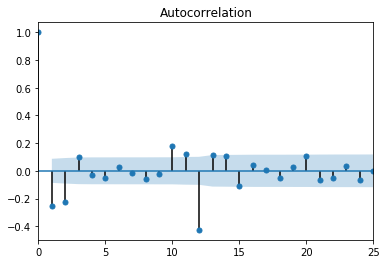

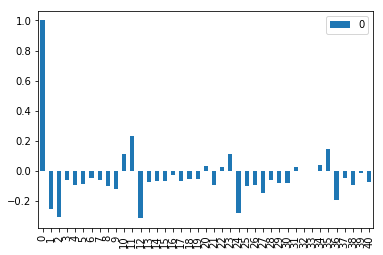

In [111]:
# Create plots for singly shifted data
plot_acf(te.Shift_1_Seas.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Shift_1_Seas.dropna(inplace=False)))
x_pacf.plot(kind='bar')

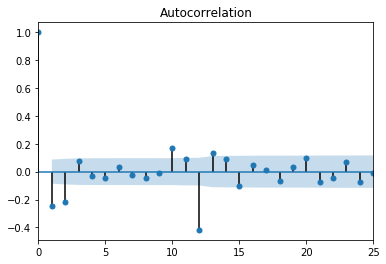

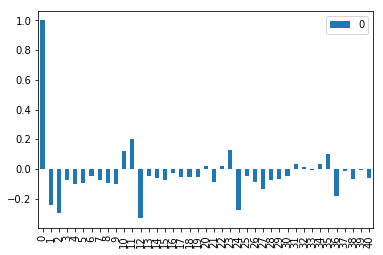

In [112]:
# Create plots for singly shifted data
plot_acf(te.Seas_Log_Diff.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Seas_Log_Diff.dropna(inplace=False)))
x_pacf.plot(kind='bar')

In [113]:
te['Seas_Log_Diff'] = np.log(te.Seasonal_Difference).diff()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


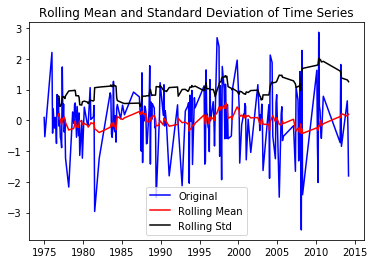

Results of Dickey-Fuller Test:
ADF Test Statistic            -1.256094e+01
p-value                        2.103280e-23
Number of Lags Used            1.000000e+00
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


In [114]:
test_stationarity(te.Seas_Log_Diff.dropna(inplace=False))

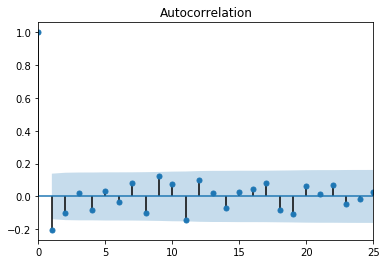

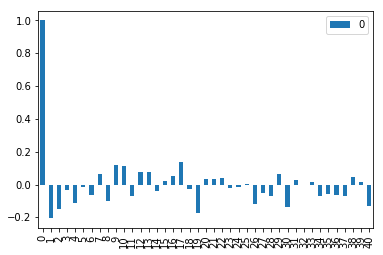

In [115]:
# Create ACF and PACF plots for data
plot_acf(te.Seas_Log_Diffx2.dropna(inplace=False))
plt.xlim(0,25)
plt.show()

x_pacf = pd.DataFrame(pacf(te.Seas_Log_Diffx2.dropna(inplace=False)))
x_pacf.plot(kind='bar')

In [116]:
# Seems like the seasonal shift followed by log shift produces most stationary model so this is one I will most likely use to build model from